In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import networkx as nx
import warnings
warnings.filterwarnings("ignore")

In [21]:
care_site = pd.read_csv('qes_2022_update/DataBricks/QES_care_sites.csv')

In [22]:
care_site

,RECORD_ID,PERSON_ID,DOS,VISIT_OCCURRENCE_ID,VISIT_CONCEPT_ID,VISIT_START_DATETIME,VISIT_END_DATETIME,SITE_DATETIME,CARE_SITE_NAME
0,1,8066312,1999/1/14 0:00,551222,9202,2005/7/13 10:45,2005/7/13 10:45,2005/7/13 10:45,LIVERTX-LIVER TX PRAC
1,1,8066312,1999/1/14 0:00,23535808,9202,2010/3/31 10:49,2010/3/31 10:49,2010/3/31 10:49,BUSINESS OFFICE SIGNON
2,1,8066312,1999/1/14 0:00,23535808,9202,2010/3/31 10:49,2010/3/31 10:49,2010/3/31 10:49,O/P VANDY DEFAULT
3,2,8537010,1999/2/25 0:00,28425778,9202,1999/6/16 8:58,1999/6/16 8:58,1999/6/16 10:41,LIVERTX-LIVER TX PRAC
4,2,8537010,1999/2/25 0:00,32998067,9202,2003/3/26 10:42,2003/3/26 10:42,2003/3/26 10:42,LIVERTX-LIVER TX PRAC
...,...,...,...,...,...,...,...,...,...
991544,8351,202044294,2022/6/29 0:00,354641534,9201,2022/6/29 5:26,NaN,2022/9/22 23:59,VUH 8MCE MEDICINE CARDIAC STEPDOWN
991545,8351,202044294,2022/6/29 0:00,354641534,9201,2022/6/29 5:26,NaN,2022/9/23 23:59,VUH 8MCE MEDICINE CARDIAC STEPDOWN
991546,8351,202044294,2022/6/29 0:00,354641534,9201,2022/6/29 5:26,NaN,2022/9/24 23:59,VUH 8MCE MEDICINE CARDIAC STEPDOWN
991547,8351,202044294,2022/6/29 0:00,354641534,9201,2022/6/29 5:26,NaN,2022/9/25 23:59,VUH 8MCE MEDICINE CARDIAC STEPDOWN


In [6]:
record_list = []
for i in np.unique(care_site['PERSON_ID']):
    t = care_site[care_site['PERSON_ID']==i]
    l = len(np.unique(t['RECORD_ID']))
    record_list.append(l)
    if l == 4:
        print(i)
max(record_list)

5438406
8347749
9830039


4

In [ ]:
#### DOS only care about date 
##to do remove hours and minutes for start and end time

In [23]:
care_site_ip = care_site[care_site['VISIT_CONCEPT_ID']==9201]
care_site_ip['Start-In'] = pd.to_datetime(care_site_ip['VISIT_START_DATETIME'])-pd.to_datetime(care_site_ip['DOS'])>datetime.timedelta(days=-90)
care_site_ip['End-In'] = pd.to_datetime(care_site_ip['VISIT_END_DATETIME'])-pd.to_datetime(care_site_ip['DOS'])<datetime.timedelta(days=90)
care_site_ip['ISPERI'] = care_site_ip['Start-In'] * care_site_ip['End-In']
care_site_ip_peri = care_site_ip[care_site_ip['ISPERI'] == True]
care_site_ip_peri['LOS'] = pd.to_datetime(care_site_ip_peri['VISIT_END_DATETIME'])-pd.to_datetime(care_site_ip_peri['VISIT_START_DATETIME'])
print('number of patients', len(np.unique(care_site_ip_peri['PERSON_ID'])))
print('number of surgeries', len(np.unique(care_site_ip_peri['RECORD_ID'])))
print('number of visits', len(np.unique(care_site_ip_peri['VISIT_OCCURRENCE_ID'])))

[  5077157   5077498   5077508 ... 231034307 231284308 234234296]
number of patients 7286
number of surgeries 7423
number of visits 8280


In [34]:
list_a = pd.read_csv('all.csv')

a = set(np.unique(list_a['VISIT_OCCURRENCE_ID']))
b = set(np.unique(care_site_ip_peri['VISIT_OCCURRENCE_ID']))

print(a - b)
print(b - a)

set()
set()


In [28]:
print(list_a.loc[list_a['PERSON_ID'] == 6056623, 'DOS']) 
print(list_a.loc[list_a['PERSON_ID'] == 202044294, 'DOS']) 

KeyError: 'DOS'

In [8]:
care_site_ip = care_site[care_site['VISIT_CONCEPT_ID']==9201]
care_site_ip['Start-In'] = pd.to_datetime(care_site_ip['VISIT_START_DATETIME'])-pd.to_datetime(care_site_ip['DOS'])>datetime.timedelta(days=-180)
care_site_ip['End-In'] = pd.to_datetime(care_site_ip['VISIT_END_DATETIME'])-pd.to_datetime(care_site_ip['DOS'])<datetime.timedelta(days=180)
care_site_ip['ISPERI'] = care_site_ip['Start-In'] * care_site_ip['End-In']
care_site_ip_peri_6 = care_site_ip[care_site_ip['ISPERI'] == True]
care_site_ip_peri_6['LOS'] = pd.to_datetime(care_site_ip_peri_6['VISIT_END_DATETIME'])-pd.to_datetime(care_site_ip_peri_6['VISIT_START_DATETIME'])
print('number of patients', len(np.unique(care_site_ip_peri_6['PERSON_ID'])))
print('number of surgeries', len(np.unique(care_site_ip_peri_6['RECORD_ID'])))
print('number of visits', len(np.unique(care_site_ip_peri_6['VISIT_OCCURRENCE_ID'])))

number of patients 264
number of surgeries 278
number of visits 306


In [120]:
care_site_ip_peri[['VISIT_OCCURRENCE_ID','LOS']].drop_duplicates()['LOS'].describe()

count                         8280
mean     2 days 04:43:22.456521739
std      2 days 14:43:05.845325329
min                0 days 00:21:00
25%                1 days 06:40:00
50%                1 days 10:29:00
75%                2 days 07:27:00
max               65 days 04:25:00
Name: LOS, dtype: object

In [166]:
care_site_ip_peri_6[['VISIT_OCCURRENCE_ID','LOS']].drop_duplicates()['LOS'].describe()

count                         8513
mean     2 days 06:17:34.908962762
std      3 days 01:15:38.605947397
min                0 days 00:21:00
25%                1 days 06:42:00
50%                1 days 10:40:00
75%                2 days 07:55:00
max              133 days 15:41:00
Name: LOS, dtype: object

In [121]:
record_list = []
for i in np.unique(care_site_ip_peri['PERSON_ID']):
    t = care_site_ip_peri[care_site_ip_peri['PERSON_ID']==i]
    l = len(np.unique(t['RECORD_ID']))
    record_list.append(l)
    if l == 3:
        print(i)
max(record_list)

5438406
6530226
6906845
7739804
7820081
8347749


3

In [178]:
sites = care_site_ip_peri['CARE_SITE_NAME'].drop_duplicates()
sites = pd.DataFrame(sites)
sites.reset_index(inplace=True,drop=True)
sites['CARE_SITE_ID'] = sites.index

care_site_ip_peri = care_site_ip_peri.merge(sites,how = 'inner', on = 'CARE_SITE_NAME')
care_site_ip_peri 

,RECORD_ID,PERSON_ID,DOS,VISIT_OCCURRENCE_ID,VISIT_CONCEPT_ID,VISIT_START_DATETIME,VISIT_END_DATETIME,SITE_DATETIME,CARE_SITE_NAME,Start-In,End-In,ISPERI,LOS,CARE_SITE_ID
0,12,14391659,2001-06-18 00:00:00.0000000,26802837,9201,2001-06-18 06:15:00.0000000,2001-06-20 12:37:00.0000000,2001-06-18 06:15:00.0000000,VMG BUS OFFICE PAV1,True,True,True,2 days 06:22:00,0
1,30,12132455,2001-10-31 00:00:00.0000000,6277295,9201,2001-10-31 05:41:00.0000000,2001-11-03 14:24:00.0000000,2001-10-31 05:41:00.0000000,VMG BUS OFFICE PAV1,True,True,True,3 days 08:43:00,0
2,30,12132455,2001-10-31 00:00:00.0000000,20031686,9201,2001-12-02 20:34:00.0000000,2001-12-11 15:00:00.0000000,2001-12-02 20:34:00.0000000,VMG BUS OFFICE PAV1,True,True,True,8 days 18:26:00,0
3,30,12132455,2001-10-31 00:00:00.0000000,11532263,9201,2001-12-16 23:35:00.0000000,2001-12-19 14:54:00.0000000,2001-12-16 23:35:00.0000000,VMG BUS OFFICE PAV1,True,True,True,2 days 15:19:00,0
4,30,12132455,2001-10-31 00:00:00.0000000,24939549,9201,2002-01-11 16:20:00.0000000,2002-01-14 17:54:00.0000000,2002-01-11 16:20:00.0000000,VMG BUS OFFICE PAV1,True,True,True,3 days 01:34:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49583,8340,8816919,2022-07-22 00:00:00.0000000,358561713,9201,2022-07-24 21:12:00.0000000,2022-08-01 12:22:00.0000000,2022-08-01 12:22:00.0000000,VUH 8 DISCHARGE LOUNGE,True,True,True,7 days 15:10:00,143
49584,8143,7228300,2022-05-02 00:00:00.0000000,355134220,9201,2022-07-07 14:04:00.0000000,2022-07-08 16:52:00.0000000,2022-07-07 14:04:00.0000000,VUH 2RW CLINICAL RESEARCH CENTER,True,True,True,1 days 02:48:00,144
49585,8143,7228300,2022-05-02 00:00:00.0000000,355134220,9201,2022-07-07 14:04:00.0000000,2022-07-08 16:52:00.0000000,2022-07-07 14:22:00.0000000,VUH 2RW CLINICAL RESEARCH CENTER,True,True,True,1 days 02:48:00,144
49586,8143,7228300,2022-05-02 00:00:00.0000000,355134220,9201,2022-07-07 14:04:00.0000000,2022-07-08 16:52:00.0000000,2022-07-07 23:59:00.0000000,VUH 2RW CLINICAL RESEARCH CENTER,True,True,True,1 days 02:48:00,144


In [167]:
sites

,CARE_SITE_NAME,CARE_SITE_ID
0,VMG BUS OFFICE PAV1,0
1,VASC-OP VASCULAR LAB,1
2,VMG BUS OFFICE PAV3,2
3,GENSG-GEN SURGERY CLIN,3
4,SUBACUTE CARE UNIT,4
...,...,...
140,VUH 1 TRANSITIONAL CARE UNIT,140
141,VWCH EMERGENCY,141
142,VWCH MEDICINE / SURGERY 2,142
143,VUH 8 DISCHARGE LOUNGE,143


In [130]:
def data_process(dataframe):
    total_list = [] #creating total list to add on
    Site_per_ID= []

    #group by patient ID
    sorted_df = dataframe.groupby(["VISIT_OCCURRENCE_ID"]).apply(lambda x: x.sort_values(["SITE_DATETIME"], 
                                                                               ascending = True)).reset_index(drop=True)
    sorted_df = sorted_df[["VISIT_OCCURRENCE_ID", "SITE_DATETIME","CARE_SITE_NAME","CARE_SITE_ID"]]
    sorted_df = sorted_df.groupby(["VISIT_OCCURRENCE_ID"])

    # sorted_data get all key
    list_key = sorted_df.groups.keys()

    # iterate each key: list_key
    for key in list_key:
        # get sub dataframe df_id
        df_id = sorted_df.get_group(key) 

        # creates a series of the column for site id
        df = df_id.iloc[:,3] 

        # gets rid of duplicates  
        df = df.loc[df.diff()!=0]
        total_list.append(df)   

    # get the number of unique locations in the hospital
    loc_cnt = len(dataframe['CARE_SITE_ID'].unique())  

    #create new source by source data matrix
    columns = dataframe['CARE_SITE_ID'].unique()
    rows = dataframe['CARE_SITE_ID'].unique()

    # intialize to be 0
    new_df = pd.DataFrame(0, index = rows, columns = columns, dtype=int) 
    
    # Loop through data and fill in matrix
    for person in total_list:
        for i in range(len(person)-1):
            a = person.iloc[i]
            b = person.iloc[i+1]
            new_df[a][b] += 1    

    #create an empty dataframe to store the nodes and edges
    cols = ["Location1", "Location2", "Weight"]
    output_df = pd.DataFrame (columns = cols, dtype = int)

    # fill in the output with values in the new_df
    index_ = 0
    for col in new_df.columns:
        for idx in new_df.index:
            if col != idx:
                output_df.loc[index_] = [col, idx, new_df[col][idx]]
                index_ += 1
                
    # drop the 0-weighted lines, this means no connection but networkx will still draw that 
    output_df = output_df.drop(output_df[output_df.iloc[:,2]==0].index, axis = 0)
    
    return output_df

In [131]:
qes_out = data_process(care_site_ip_peri)
qes_out

,Location1,Location2,Weight
0,0,1,22
2,0,3,1
3,0,4,4
5,0,6,191
6,0,7,99
...,...,...,...
20290,140,130,2
20292,140,132,1
20298,140,138,4
20445,141,142,1


In [86]:
def metrics_calc(df):
    # create a graph and add edges according to the values in the output_df
    di_G = nx.DiGraph()

    for idx in df.itertuples():
        di_G.add_edge(idx[1], idx[2],weight = idx[3])
    
    #nx.draw_networkx(di_G)
    
    # calculate the degree
    G_degree = di_G.degree()
    
    # calculate the degree centrality
    # assume important nodes have many connections, numbers of neighbors
    indeg_Cent = nx.in_degree_centrality(di_G)
    outdeg_Cent = nx.out_degree_centrality(di_G)
    
    # assume important nodes are close to other nodes
    # closeness centrality
    close_Cent = nx.closeness_centrality(di_G)
    
    # betweenness Centrality
    # assume important nodes connect other nodes
    # include/exclude the node itself

    btwn_Cent = nx.betweenness_centrality(di_G, normalized = True, endpoints = False)
    
    # eigen_Cent = eigenvector_centrality(di_G)
    
    #hubs
    hubs, auth =  nx.hits(di_G)
    
    # transfer the metrics into dictionary type
    degree = dict(G_degree)
    indeg_Cent = dict(indeg_Cent)
    outdeg_Cent = dict(outdeg_Cent)
    close_Cent = dict(close_Cent)
    btwn_Cent = dict(btwn_Cent)
    # eigen_Cent = dict(eigen_Cent)
    hubs = dict(hubs)
    auth = dict(auth)
    
    merics_list = [degree, indeg_Cent, outdeg_Cent, close_Cent, btwn_Cent, hubs, auth]
    
    
    return di_G, merics_list

In [137]:
# fill all metrics into a dataframe
# initialize a new dataframe
def metrics(df, metrics_list):
    cols = ['Degree', 'In_Degree','Out_Degree','Closeness', 'Betweenness', 'Hubs', 'Auth']
    rows = df['CARE_SITE_ID'].unique()
    net_metrics = pd.DataFrame(0, index = rows, columns=cols)

    # fill in the dataframe with the metrics
    for i in range(len(cols)):
        net_metrics[cols[i]] = pd.DataFrame.from_dict(metrics_list[i], orient = 'index', columns = [cols[i]])

    # make the site id a column insead of index
    net_metrics = net_metrics.reset_index().rename(columns = {'index':'CARE_SITE_ID'})

    # merge the site name back to the dateframe
    df_metrics = pd.merge(net_metrics, sites, how='left', on = ['CARE_SITE_ID'])
    
    return df_metrics
    

In [177]:
care_site_ip_peri

,RECORD_ID,PERSON_ID,DOS,VISIT_OCCURRENCE_ID,VISIT_CONCEPT_ID,VISIT_START_DATETIME,VISIT_END_DATETIME,SITE_DATETIME,CARE_SITE_NAME,Start-In,End-In,ISPERI,LOS
666,12,14391659,2001-06-18 00:00:00.0000000,26802837,9201,2001-06-18 06:15:00.0000000,2001-06-20 12:37:00.0000000,2001-06-18 06:15:00.0000000,VMG BUS OFFICE PAV1,True,True,True,2 days 06:22:00
1367,30,12132455,2001-10-31 00:00:00.0000000,6277295,9201,2001-10-31 05:41:00.0000000,2001-11-03 14:24:00.0000000,2001-10-31 05:41:00.0000000,VMG BUS OFFICE PAV1,True,True,True,3 days 08:43:00
1375,30,12132455,2001-10-31 00:00:00.0000000,20031686,9201,2001-12-02 20:34:00.0000000,2001-12-11 15:00:00.0000000,2001-12-02 20:34:00.0000000,VMG BUS OFFICE PAV1,True,True,True,8 days 18:26:00
1377,30,12132455,2001-10-31 00:00:00.0000000,11532263,9201,2001-12-16 23:35:00.0000000,2001-12-19 14:54:00.0000000,2001-12-16 23:35:00.0000000,VMG BUS OFFICE PAV1,True,True,True,2 days 15:19:00
1388,30,12132455,2001-10-31 00:00:00.0000000,24939549,9201,2002-01-11 16:20:00.0000000,2002-01-14 17:54:00.0000000,2002-01-11 16:20:00.0000000,VMG BUS OFFICE PAV1,True,True,True,3 days 01:34:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991409,8350,158074295,2022-07-25 00:00:00.0000000,355472319,9201,2022-07-25 11:12:00.0000000,2022-07-27 11:14:00.0000000,2022-07-25 23:59:00.0000000,VUH MCE OR,True,True,True,2 days 00:02:00
991410,8350,158074295,2022-07-25 00:00:00.0000000,355472319,9201,2022-07-25 11:12:00.0000000,2022-07-27 11:14:00.0000000,2022-07-26 23:59:00.0000000,VUH MCE OR,True,True,True,2 days 00:02:00
991411,8350,158074295,2022-07-25 00:00:00.0000000,355472319,9201,2022-07-25 11:12:00.0000000,2022-07-27 11:14:00.0000000,2022-07-27 00:05:00.0000000,VCH 11 ADULT MEDICINE VUH,True,True,True,2 days 00:02:00
991412,8350,158074295,2022-07-25 00:00:00.0000000,355472319,9201,2022-07-25 11:12:00.0000000,2022-07-27 11:14:00.0000000,2022-07-27 00:05:00.0000000,VUH MCE OR,True,True,True,2 days 00:02:00


In [138]:
qes_out = data_process(care_site_ip_peri)
qes_G, qes_list = metrics_calc(qes_out)
qes_metrics = metrics(care_site_ip_peri, qes_list)

In [134]:
qes_out

,Location1,Location2,Weight
0,0,1,22
2,0,3,1
3,0,4,4
5,0,6,191
6,0,7,99
...,...,...,...
20290,140,130,2
20292,140,132,1
20298,140,138,4
20445,141,142,1


In [139]:
qes_list

[{0: 59,
  1: 9,
  3: 1,
  4: 1,
  6: 93,
  7: 56,
  8: 80,
  9: 81,
  10: 16,
  11: 33,
  12: 20,
  13: 29,
  14: 11,
  15: 12,
  16: 18,
  18: 6,
  20: 13,
  23: 5,
  27: 9,
  28: 13,
  34: 3,
  35: 11,
  36: 12,
  37: 26,
  39: 11,
  43: 31,
  46: 4,
  47: 17,
  49: 4,
  53: 8,
  54: 7,
  56: 14,
  57: 6,
  59: 8,
  68: 19,
  69: 33,
  85: 6,
  93: 9,
  98: 1,
  2: 1,
  19: 10,
  24: 17,
  25: 3,
  26: 5,
  29: 5,
  30: 8,
  40: 15,
  41: 2,
  42: 16,
  48: 2,
  50: 2,
  51: 8,
  52: 6,
  58: 8,
  60: 2,
  61: 5,
  63: 6,
  70: 3,
  71: 4,
  72: 2,
  73: 6,
  75: 2,
  76: 5,
  79: 4,
  84: 2,
  88: 2,
  89: 1,
  90: 8,
  94: 2,
  96: 2,
  97: 3,
  17: 6,
  21: 12,
  32: 8,
  38: 2,
  91: 7,
  31: 2,
  45: 16,
  55: 6,
  62: 6,
  80: 2,
  81: 5,
  82: 6,
  83: 4,
  22: 3,
  65: 5,
  66: 2,
  67: 2,
  33: 2,
  74: 2,
  64: 2,
  77: 2,
  78: 2,
  95: 2,
  86: 2,
  92: 2,
  87: 2,
  99: 35,
  100: 43,
  101: 24,
  102: 1,
  103: 3,
  104: 6,
  105: 20,
  106: 26,
  107: 11,
  108: 29,
 

In [140]:
qes_metrics

,CARE_SITE_ID,Degree,In_Degree,Out_Degree,Closeness,Betweenness,Hubs,Auth,CARE_SITE_NAME
0,0,59.0,0.150000,0.271429,0.362019,0.086017,5.745233e-01,1.185290e-03,VMG BUS OFFICE PAV1
1,1,9.0,0.014286,0.050000,0.266331,0.000000,6.329298e-04,3.835314e-03,VASC-OP VASCULAR LAB
2,2,1.0,0.000000,0.007143,0.000000,0.000000,3.314891e-04,0.000000e+00,VMG BUS OFFICE PAV3
3,3,1.0,0.007143,0.000000,0.237610,0.000000,0.000000e+00,1.742869e-04,GENSG-GEN SURGERY CLIN
4,4,1.0,0.007143,0.000000,0.237610,0.000000,0.000000e+00,6.971475e-04,SUBACUTE CARE UNIT
...,...,...,...,...,...,...,...,...,...
140,140,9.0,0.035714,0.028571,0.123429,0.000369,-3.953126e-20,-2.660831e-19,VUH 1 TRANSITIONAL CARE UNIT
141,141,1.0,0.000000,0.007143,0.000000,0.000000,-3.128965e-25,0.000000e+00,VWCH EMERGENCY
142,142,1.0,0.007143,0.000000,0.007143,0.000000,0.000000e+00,-8.860647e-22,VWCH MEDICINE / SURGERY 2
143,143,5.0,0.028571,0.007143,0.111532,0.000038,-5.359855e-21,-2.057258e-21,VUH 8 DISCHARGE LOUNGE


In [141]:
sites

,CARE_SITE_NAME,CARE_SITE_ID
0,VMG BUS OFFICE PAV1,0
1,VASC-OP VASCULAR LAB,1
2,VMG BUS OFFICE PAV3,2
3,GENSG-GEN SURGERY CLIN,3
4,SUBACUTE CARE UNIT,4
...,...,...
140,VUH 1 TRANSITIONAL CARE UNIT,140
141,VWCH EMERGENCY,141
142,VWCH MEDICINE / SURGERY 2,142
143,VUH 8 DISCHARGE LOUNGE,143


In [168]:
len(qes_G.nodes())

141

In [142]:
care_site_ip_peri[care_site_ip_peri['CARE_SITE_ID']==144]

,RECORD_ID,PERSON_ID,DOS,VISIT_OCCURRENCE_ID,VISIT_CONCEPT_ID,VISIT_START_DATETIME,VISIT_END_DATETIME,SITE_DATETIME,CARE_SITE_NAME,Start-In,End-In,ISPERI,LOS,CARE_SITE_ID
49584,8143,7228300,2022-05-02 00:00:00.0000000,355134220,9201,2022-07-07 14:04:00.0000000,2022-07-08 16:52:00.0000000,2022-07-07 14:04:00.0000000,VUH 2RW CLINICAL RESEARCH CENTER,True,True,True,1 days 02:48:00,144
49585,8143,7228300,2022-05-02 00:00:00.0000000,355134220,9201,2022-07-07 14:04:00.0000000,2022-07-08 16:52:00.0000000,2022-07-07 14:22:00.0000000,VUH 2RW CLINICAL RESEARCH CENTER,True,True,True,1 days 02:48:00,144
49586,8143,7228300,2022-05-02 00:00:00.0000000,355134220,9201,2022-07-07 14:04:00.0000000,2022-07-08 16:52:00.0000000,2022-07-07 23:59:00.0000000,VUH 2RW CLINICAL RESEARCH CENTER,True,True,True,1 days 02:48:00,144
49587,8143,7228300,2022-05-02 00:00:00.0000000,355134220,9201,2022-07-07 14:04:00.0000000,2022-07-08 16:52:00.0000000,2022-07-08 16:52:00.0000000,VUH 2RW CLINICAL RESEARCH CENTER,True,True,True,1 days 02:48:00,144


In [169]:
care_site_ip_peri[care_site_ip_peri['PERSON_ID']==7228300]

,RECORD_ID,PERSON_ID,DOS,VISIT_OCCURRENCE_ID,VISIT_CONCEPT_ID,VISIT_START_DATETIME,VISIT_END_DATETIME,SITE_DATETIME,CARE_SITE_NAME,Start-In,End-In,ISPERI,LOS
978217,8143,7228300,2022-05-02 00:00:00.0000000,358201298,9201,2022-05-02 06:20:00.0000000,2022-05-04 13:37:00.0000000,2022-05-02 06:20:00.0000000,VUH MAIN OR,True,True,True,2 days 07:17:00
978218,8143,7228300,2022-05-02 00:00:00.0000000,358201298,9201,2022-05-02 06:20:00.0000000,2022-05-04 13:37:00.0000000,2022-05-02 10:08:00.0000000,VUH MAIN OR,True,True,True,2 days 07:17:00
978219,8143,7228300,2022-05-02 00:00:00.0000000,358201298,9201,2022-05-02 06:20:00.0000000,2022-05-04 13:37:00.0000000,2022-05-02 17:15:00.0000000,VUH 7CCT ORTHO,True,True,True,2 days 07:17:00
978220,8143,7228300,2022-05-02 00:00:00.0000000,358201298,9201,2022-05-02 06:20:00.0000000,2022-05-04 13:37:00.0000000,2022-05-02 17:15:00.0000000,VUH MAIN OR,True,True,True,2 days 07:17:00
978221,8143,7228300,2022-05-02 00:00:00.0000000,358201298,9201,2022-05-02 06:20:00.0000000,2022-05-04 13:37:00.0000000,2022-05-02 23:59:00.0000000,VUH 7CCT ORTHO,True,True,True,2 days 07:17:00
978222,8143,7228300,2022-05-02 00:00:00.0000000,358201298,9201,2022-05-02 06:20:00.0000000,2022-05-04 13:37:00.0000000,2022-05-03 01:16:00.0000000,VUH 7CCT ORTHO,True,True,True,2 days 07:17:00
978223,8143,7228300,2022-05-02 00:00:00.0000000,358201298,9201,2022-05-02 06:20:00.0000000,2022-05-04 13:37:00.0000000,2022-05-03 01:16:00.0000000,VUH 8CCT MEDICAL ICU,True,True,True,2 days 07:17:00
978224,8143,7228300,2022-05-02 00:00:00.0000000,358201298,9201,2022-05-02 06:20:00.0000000,2022-05-04 13:37:00.0000000,2022-05-03 02:36:00.0000000,VUH 8CCT MEDICAL ICU,True,True,True,2 days 07:17:00
978225,8143,7228300,2022-05-02 00:00:00.0000000,358201298,9201,2022-05-02 06:20:00.0000000,2022-05-04 13:37:00.0000000,2022-05-03 10:08:00.0000000,VUH 8CCT MEDICAL ICU,True,True,True,2 days 07:17:00
978226,8143,7228300,2022-05-02 00:00:00.0000000,358201298,9201,2022-05-02 06:20:00.0000000,2022-05-04 13:37:00.0000000,2022-05-03 18:59:00.0000000,VUH 8CCT MEDICAL ICU,True,True,True,2 days 07:17:00


In [143]:
care_site_ip_peri[care_site_ip_peri['VISIT_OCCURRENCE_ID']==355134220]

,RECORD_ID,PERSON_ID,DOS,VISIT_OCCURRENCE_ID,VISIT_CONCEPT_ID,VISIT_START_DATETIME,VISIT_END_DATETIME,SITE_DATETIME,CARE_SITE_NAME,Start-In,End-In,ISPERI,LOS,CARE_SITE_ID
49584,8143,7228300,2022-05-02 00:00:00.0000000,355134220,9201,2022-07-07 14:04:00.0000000,2022-07-08 16:52:00.0000000,2022-07-07 14:04:00.0000000,VUH 2RW CLINICAL RESEARCH CENTER,True,True,True,1 days 02:48:00,144
49585,8143,7228300,2022-05-02 00:00:00.0000000,355134220,9201,2022-07-07 14:04:00.0000000,2022-07-08 16:52:00.0000000,2022-07-07 14:22:00.0000000,VUH 2RW CLINICAL RESEARCH CENTER,True,True,True,1 days 02:48:00,144
49586,8143,7228300,2022-05-02 00:00:00.0000000,355134220,9201,2022-07-07 14:04:00.0000000,2022-07-08 16:52:00.0000000,2022-07-07 23:59:00.0000000,VUH 2RW CLINICAL RESEARCH CENTER,True,True,True,1 days 02:48:00,144
49587,8143,7228300,2022-05-02 00:00:00.0000000,355134220,9201,2022-07-07 14:04:00.0000000,2022-07-08 16:52:00.0000000,2022-07-08 16:52:00.0000000,VUH 2RW CLINICAL RESEARCH CENTER,True,True,True,1 days 02:48:00,144


In [170]:
qes_metrics['in_flow'] = 0
qes_metrics['out_flow'] = 0
for i in qes_metrics.index:
    care_site_n = qes_metrics['CARE_SITE_ID'][i]
    in_flow = sum(qes_out[qes_out['Location2']==care_site_n]['Weight'])
    out_flow = sum(qes_out[qes_out['Location1']==care_site_n]['Weight'])
    qes_metrics['in_flow'][i] = in_flow
    qes_metrics['out_flow'][i] = out_flow

qes_metrics['InDegree'] = qes_metrics['In_Degree'] * (len(qes_G.nodes())-1)
qes_metrics['OutDegree'] = qes_metrics['Out_Degree'] * (len(qes_G.nodes())-1)
    

qes_metrics['1st_in_avg_in_degree'] = 0.0
qes_metrics['1st_in_avg_out_degree'] = 0.0
qes_metrics['1st_out_avg_in_degree'] = 0.0
qes_metrics['1st_out_avg_out_degree'] = 0.0
for i in qes_metrics.index:
    care_site_n = qes_metrics['CARE_SITE_ID'][i]
    in_flow = qes_out[qes_out['Location2']==care_site_n]['Location1']
    qes_metrics['1st_in_avg_in_degree'][i] = np.mean(qes_metrics[qes_metrics['CARE_SITE_ID'].isin(in_flow)]['InDegree'])
    qes_metrics['1st_in_avg_out_degree'][i] = np.mean(qes_metrics[qes_metrics['CARE_SITE_ID'].isin(in_flow)]['OutDegree'])
    out_flow = qes_out[qes_out['Location1']==care_site_n]['Location2']
    qes_metrics['1st_out_avg_in_degree'][i] = np.mean(qes_metrics[qes_metrics['CARE_SITE_ID'].isin(out_flow)]['InDegree'])
    qes_metrics['1st_out_avg_out_degree'][i] = np.mean(qes_metrics[qes_metrics['CARE_SITE_ID'].isin(out_flow)]['OutDegree'])
    
qes_metrics['In-Out'] = (qes_metrics['InDegree'] - qes_metrics['OutDegree'])
qes_metrics['flow_In-Out'] = (qes_metrics['in_flow'] - qes_metrics['out_flow'])

In [ ]:
# 向a输送病人的 caresite 的avg indegree 和 outdegree   todo：avg degree？
# 从a接受病人的 caresite 的avg indegree 和 outdegree   todo：avg degree？
# 只要跟a有病人交换的的caresite todo： avg indegree outdegree degree？

In [171]:
qes_metrics

,CARE_SITE_ID,Degree,In_Degree,Out_Degree,Closeness,Betweenness,Hubs,Auth,CARE_SITE_NAME,in_flow,out_flow,1st_in_avg_in_degree,1st_in_avg_out_degree,1st_out_avg_in_degree,1st_out_avg_out_degree,InDegree,OutDegree,In-Out,flow_In-Out
0,0,59.0,0.150000,0.271429,0.362019,0.086017,5.745233e-01,1.185290e-03,VMG BUS OFFICE PAV1,393,4555,14.52381,14.095238,9.842105,9.526316,21.0,38.0,-17.0,-4162
1,1,9.0,0.014286,0.050000,0.266331,0.000000,6.329298e-04,3.835314e-03,VASC-OP VASCULAR LAB,23,10,28.00000,48.000000,22.714286,23.571429,2.0,7.0,-5.0,13
2,2,1.0,0.000000,0.007143,0.000000,0.000000,3.314891e-04,0.000000e+00,VMG BUS OFFICE PAV3,0,2,NaN,NaN,41.000000,40.000000,0.0,1.0,-1.0,-2
3,3,1.0,0.007143,0.000000,0.237610,0.000000,0.000000e+00,1.742869e-04,GENSG-GEN SURGERY CLIN,1,0,21.00000,38.000000,NaN,NaN,1.0,0.0,1.0,1
4,4,1.0,0.007143,0.000000,0.237610,0.000000,0.000000e+00,6.971475e-04,SUBACUTE CARE UNIT,4,0,21.00000,38.000000,NaN,NaN,1.0,0.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,140,9.0,0.035714,0.028571,0.123429,0.000369,-3.953126e-20,-2.660831e-19,VUH 1 TRANSITIONAL CARE UNIT,13,9,11.20000,18.000000,10.750000,10.250000,5.0,4.0,1.0,4
141,141,1.0,0.000000,0.007143,0.000000,0.000000,-3.128965e-25,0.000000e+00,VWCH EMERGENCY,0,1,NaN,NaN,1.000000,0.000000,0.0,1.0,-1.0,-1
142,142,1.0,0.007143,0.000000,0.007143,0.000000,0.000000e+00,-8.860647e-22,VWCH MEDICINE / SURGERY 2,1,0,0.00000,1.000000,NaN,NaN,1.0,0.0,1.0,1
143,143,5.0,0.028571,0.007143,0.111532,0.000038,-5.359855e-21,-2.057258e-21,VUH 8 DISCHARGE LOUNGE,15,1,10.75000,10.500000,17.000000,16.000000,4.0,1.0,3.0,14


### Care site is a distributor or receiver?

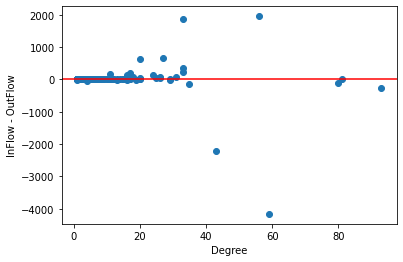

In [173]:
plt.scatter(x = qes_metrics['Degree'], y = qes_metrics['flow_In-Out'])
plt.ylabel("InFlow - OutFlow")
plt.xlabel("Degree")
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.show()


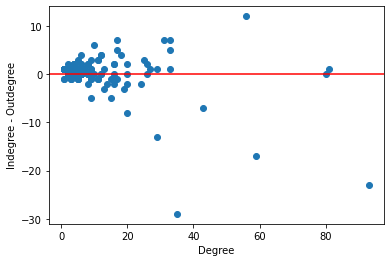

In [160]:
plt.scatter(x = qes_metrics['Degree'], y = qes_metrics['In-Out'])
plt.ylabel("Indegree - Outdegree")
plt.xlabel("Degree")
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.show()

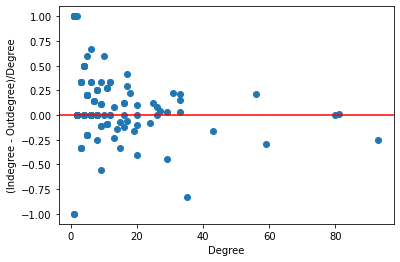

In [176]:
plt.scatter(x = qes_metrics['Degree'], y = qes_metrics['In-Out']/qes_metrics['Degree'])
plt.ylabel("(Indegree - Outdegree)/Degree")
plt.xlabel("Degree")
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.show()

In [174]:
qes_metrics[qes_metrics['Degree']>85]

,CARE_SITE_ID,Degree,In_Degree,Out_Degree,Closeness,Betweenness,Hubs,Auth,CARE_SITE_NAME,in_flow,out_flow,1st_in_avg_in_degree,1st_in_avg_out_degree,1st_out_avg_in_degree,1st_out_avg_out_degree,InDegree,OutDegree,In-Out,flow_In-Out
6,6,93.0,0.25,0.414286,0.35563,0.16343,0.003306,0.033729,ED SPECIALTY ADULT,276,527,5.628571,6.285714,6.913793,6.482759,35.0,58.0,-23.0,-251


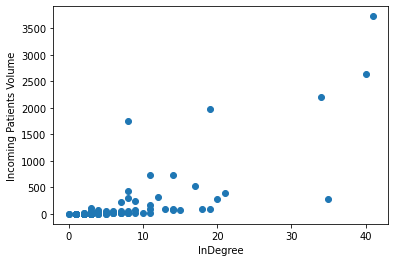

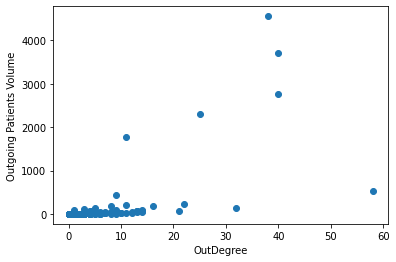

In [154]:
plt.scatter(x = qes_metrics['InDegree'], y = qes_metrics['in_flow'])
plt.ylabel("Incoming Patients Volume")
plt.xlabel("InDegree")
plt.show()
plt.scatter(x = qes_metrics['OutDegree'], y = qes_metrics['out_flow'])
plt.ylabel("Outgoing Patients Volume")
plt.xlabel("OutDegree")
plt.show()

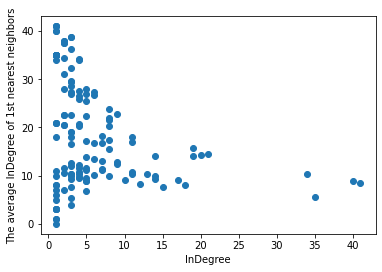

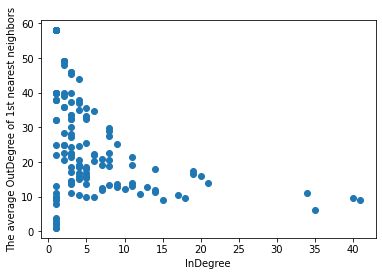

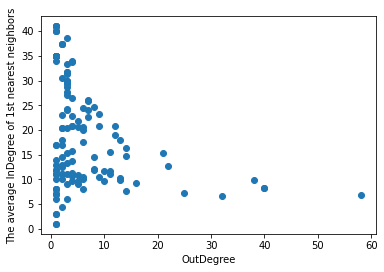

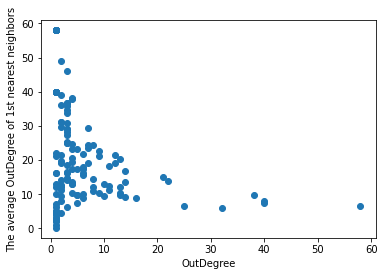

In [161]:
plt.scatter(x = qes_metrics['InDegree'], y = qes_metrics['1st_in_avg_in_degree'])
plt.ylabel("The average InDegree of 1st nearest neighbors")
plt.xlabel("InDegree")
plt.show()
plt.scatter(x = qes_metrics['InDegree'], y = qes_metrics['1st_in_avg_out_degree'])
plt.ylabel("The average OutDegree of 1st nearest neighbors")
plt.xlabel("InDegree")
plt.show()
plt.scatter(x = qes_metrics['OutDegree'], y = qes_metrics['1st_out_avg_in_degree'])
plt.ylabel("The average InDegree of 1st nearest neighbors")
plt.xlabel("OutDegree")
plt.show()
plt.scatter(x = qes_metrics['OutDegree'], y = qes_metrics['1st_out_avg_out_degree'])
plt.ylabel("The average OutDegree of 1st nearest neighbors")
plt.xlabel("OutDegree")
plt.show()

Node A:
NN(A): in/out-degree +
Node A: in/out-degree -



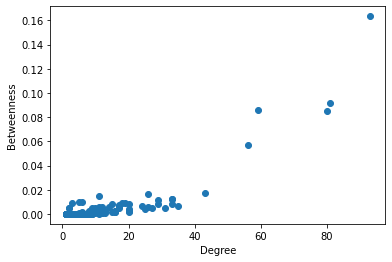

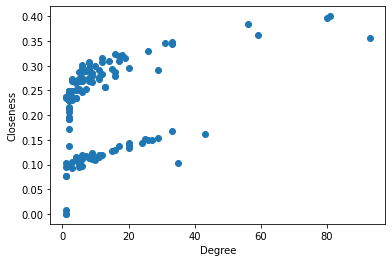

In [162]:
plt.scatter(x = qes_metrics['Degree'], y = qes_metrics['Betweenness'])
plt.ylabel("Betweenness")
plt.xlabel("Degree")
plt.show()
plt.scatter(x = qes_metrics['Degree'], y = qes_metrics['Closeness'])
plt.ylabel("Closeness")
plt.xlabel("Degree")
plt.show()
# high closeness group and low closeness group

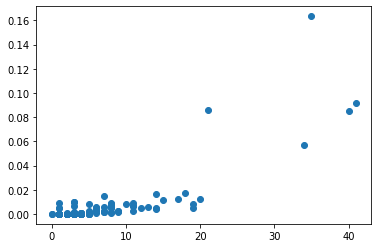

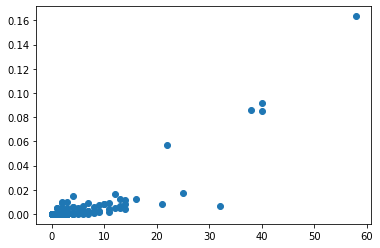

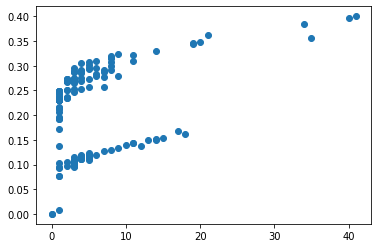

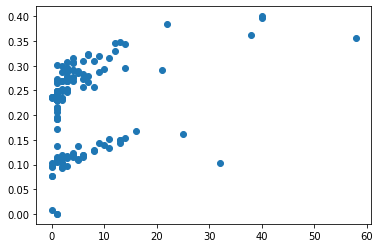

In [163]:
plt.scatter(x = qes_metrics['InDegree'], y = qes_metrics['Betweenness'])
plt.show()
plt.scatter(x = qes_metrics['OutDegree'], y = qes_metrics['Betweenness'])
plt.show()
plt.scatter(x = qes_metrics['InDegree'], y = qes_metrics['Closeness'])
plt.show()
plt.scatter(x = qes_metrics['OutDegree'], y = qes_metrics['Closeness'])
plt.show()
